<h1>Stanford Open Policing Project dataset</h1>

<p>Faremos a análise de paradas de tráfego pela polícia coletadas pela Stanford Open Policing Project. Foram coletados dados de 31 estados dos EUA, mas nesse projeto focaremos no Estado de Rhode Island. Caso queira olhar todos os 31 estados, basta acessar este <a href="https://openpolicing.stanford.edu/data/">link</a></p>

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.ezilon.com%2Fmaps%2Fimages%2Fusa%2Frhode_island_simple.gif&f=1&nofb=1">

<h1>Pré-processamento de dados- Parte 1</h1>

Antes de qualquer análise, é crucial que primeiro examinemos os dados para entender com o que estamos lidando e uma eventual limpeza de dados. Primeiramente importamos a biblioteca `pandas`, que é responsável pela manipulação de dados que faremos. Em seguida, leremos o arquivo através do comando `pd.read_csv()`, onde passaremos o nome do arquivo CSV que estamos lendo, de forma que agora teremos um data frame, composto por linhas e colunas. Por fim, visualizamos esses dados através do comando `df.head()`.

<b style="color:red">Observações</b>:
- De agora em diante usaremos a sigla `df` para nos referirmos à data frame
- A biblioteca pandas foi chamada de `pd`, que é o apelido padrão usado dentro da comunidade

Link da documentação do <a href="https://pandas.pydata.org/">pandas</a>

Link da documentação do <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">pd.read_csv</a>

In [1]:
import pandas as pd
ri = pd.read_csv("police.csv")
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


Vemos que cada linha do nosso data frame representa uma única parada, enquanto que as colunas mostram algumas informações. Vemos também que a coluna `county_name` possui seus valores iniciais $Nan$, o que indica um valor ausente. A ausência de dados pode significar duas coisas:

1. Não foram coletados quando houveram as paradas.
2. Não são relevantes para análise

De toda forma, precisamos de um método para lidarmos com esses valores faltantes.

<h2>Localizando valores faltantes</h2>

Uma forma de localizar os dados ausentes é usando o comando: `df.isna().sum()`. O comando `isna()` será responsável pela busca de valores ausentes em todas as colunas, enquanto o comando `sum()` fará a soma da quantidade de valores ausentes nas colunas. Além disso, é importante compararmos a quantidade de valores faltantes com a quantidade de linhas do nosso conjunto de dados. Para isso usaremos o comando `df.shape`, que nos retorna a quantidade de linhas (primeiro valor) e as colunas (segundo valor) do nosso data frame

In [3]:
print("Quantidade de linhas e colunuas presentes no nosso data frame:", ri.shape, end="")
ri.isna().sum()

Quantidade de linhas e colunuas presentes no nosso data frame: (91741, 15)

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

Como podemos observar, a coluna `county_name` está apenas com valores faltantes.

<h2>Removendo valores faltantes do nosso data frame</h2>

<h3>Removendo colunas</h3>

Como visto, a coluna `county_name` possui apenas valores nulos, então podemos afirmar que ela não será importante para nossa análise, portanto podemos retirá-la. Faremos isso através do comando `df.drop` que exige alguns parâmetros:

<ul>
    <li><b>axis</b>: responsável por informar se faremos uma remoção nas linha (eixo 0) ou nas colunas (eixo 1)</li>
    <li><b>inplace</b>: responsável por fazer com que a mudança em nosso data frame sejam permanentes</li>
    <li><b>columns</b>: nome da coluna que será removida</li>
</ul>

Link da documentação do <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html">df.drop()</a>

In [4]:
ri.drop(axis=1, columns="county_name", inplace=True)
ri.shape

(91741, 14)

<h3>Removendo linhas</h3>

Outra forma de eliminarmos valores não nulos é aplicando a função `df.dropna()` no data frame. Ao rodar esse comando, serão eliminadas todas as linhas que que tiverem valores nulos. Podemos decidir quais colunas são importantes a serem levadas em consideração na eliminação das linhas. As nossas colunas de interesse são `stop_date` e `stop_time`, já que contêm dados a respeito da data e hora da parada de um veículo, respectivamente. Logo se tivermos alguma linha em que aquelas colunas estiverem vazias, essa linha será eliminada

In [5]:
ri.dropna(subset=["stop_date", "stop_time"], inplace=True)

In [6]:
ri.shape

(91741, 14)

Uma outra coluna importante para nossas futuras análises, é a `driver_gender`, já que pode haver algum relacionamento entre o gênero que estava no volante no momento da parada e o policiamento, é importante nos livrarmos de valores nulos

In [7]:
ri.dropna(subset=["driver_gender"], inplace=True)
ri.shape

(86536, 14)

<h2>Usando tipo de dados apropriados</h2>

Nesse ponto, continuaremos a limpeza do nosso dataset, mas dessa vez, será de forma a garantir que os tipos de dados são adequados para cada coluna. Faremos isso através do comando `df.info()` que nos retorna o tipo de dado de cada coluna

In [ ]:
ri.info()

Podemos ver que temos apenas dois tipos de dados:

- `object`: São tipos de dados que geralmente são strings, mas podem ser outros tipos de objeto Python
- `bool`: Composto pelos valores `True` e `False`

Saber com que tipo de dado estamos lidando afetará diretamente as operações que faremos com esses dados. Por exemplo, caso precisássemos fazer uma operação matemática em uma determinada coluna e o tipo de dado presente nela fosse `object`, seria impossível, mesmo que tivéssemos valores numéricos

Os outros tipos de dados que o pandas suporta são: 

`int`, `float`: permitem operações matemáticas 

`datetime`: permite a operação com datas

`category`: faz o uso de menos memória, o que resulta em menos processamento

<h3>Corrigindo um tipo de dado</h3>

Correção é feita através sobrescrevendo o tipo de dado presente, usando o comando `df["column_name"] = df["column_name"].astype("data_type")`. Por exemplo, vamos checar o tipo de dados da coluna `is_arrested`

In [8]:
ri["is_arrested"].dtype

dtype('O')

Podemos ver que é do tipo `object`, dado pela letra O. Mas, quais são os tipos de dados presentes nessa coluna? Para isso, olharemos apenas os valores únicos presentes nesta coluna através do comando `unique()` que nos retorna um array contendo os valores únicos de uma coluna

In [9]:
ri["is_arrested"].unique()

array([False, True], dtype=object)

Por se tratar de apenas valores `True` e `False`, podemos converter essa coluna para o tipo `bool`

In [10]:
ri["is_arrested"] = ri["is_arrested"].astype(bool)

Agora, se olharmos o tipo de dado da coluna em questão, vemos que ela é do tipo booleano

In [11]:
ri["is_arrested"].dtype

dtype('bool')

<h1>Criando um Date Time Index</h1>

No nosso data frame temos uma coluna que indica a data da parada e outra coluna que indica a hora. Vamos olhar os tipos de dados presente nelas

In [12]:
display(ri["stop_date"].dtype)
ri["stop_time"].dtype

dtype('O')

dtype('O')

Podemos ver que ambas são do tipo objeto. Mas seria muito interessante para nossa análise se pudéssemos combinar essas duas colunas e convertê-las para o tipo `datetime`, pois dessa forma seríamos capazes de fazer operações com datas.

<h2>Combinando colunas</h2>

Podemos facilmente combinar colunas do tipo `object` através do comando `cat` presente no tipo de dado string. Passamos um parâmetro chamado `sep` que irá colocar um separador entre as palavras que estão sendo combinadas

In [13]:
ri["stop_date"].str.replace("/", "-")
combined = ri["stop_date"].str.cat(ri["stop_time"], sep=" ")
combined.head(3)

0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
Name: stop_date, dtype: object

Criamos uma nova coluna que receberá o valor dos valores combinados já convertidos para `datetime` através do comando `pd.to_datetime()`

In [14]:
ri["stop_datetime"] = pd.to_datetime(combined)
ri.dtypes

state                         object
stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

<h2>Mudando o index do data frame</h2>

Mais uma vez, o pandas nos permite facilmente fazer isso, através do comando `df.set_index()`, o qual pega uma coluna qualquer e o coloca como novo index do conjunto de dados. Devemos passar o parâmetro `inplace` para que essa mudança seja permanente

Link para a documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html">aqui</a>

In [15]:
ri.set_index("stop_datetime", inplace=True)

In [16]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [17]:
ri.columns

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

Perceba que ao transformar uma coluna em índice, temos que essa coluna não está mais presente nas colunas do data frame

In [18]:
ri.head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


<h3>Últimos tratamentos</h3>

Como sabemos, nosso dataset é apenas referente ao Estado de Rhode Island, logo, não há sentido em permanecer com ele presente

In [19]:
ri.drop(axis="columns", columns="state", inplace=True)
ri.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


Além disso, é importante garantirmos que os dados presentes nas colunas estão com seu tipo certo. E mais uma vez, chamaremos o comando `info()` sobre o data frame

In [20]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  bool  
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB


No fim, ficamos com 13 colunas, sendo 10 tipo `object` e 3 do tipo `bool`. Com nosso dataset limpo, podemos começar a explorar esses dados, de forma a responder perguntas a respeito dos dados coletados

<h1>Análise exploratória dos dados - Parte 1</h1>

A partir de agora começaremos a explorar a relação entre o policiamento e algumas variáveis do conjunto, de forma a responder perguntas específicas.

<h2>Contando valores únicos</h2>

Através da função `df.value_counts`, obteremos frequência absoluta dos resultados das paradas no tráfego, em ordem decrescente

Link da documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html">aqui</a>

In [21]:
ri["stop_outcome"].value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

Podemos ver que os principais resultados das paradas são multas e avisos (Warning). Se relativizarmos isso, podemos saber a porcentagem de cada resultado da parada. O pandas nos permite fazer isso facilmente através do parâmetro `normalize`. A multplicação por 100 é para termo uma visualização mais agradável

In [22]:
ri["stop_outcome"].value_counts(normalize=True)*100

Citation            89.085467
Warning              5.935102
Arrest Driver        3.160534
No Action            0.721087
N/D                  0.701442
Arrest Passenger     0.396367
Name: stop_outcome, dtype: float64

Ao enxergar esses dados em porcentagem, vemos a proporção de cada ocorrência. Podemos ver que são raros os casos em que houve prisões, seja de algum passageiro, ou seja do motorista. 

Uma coisa interessantes, é que se somarmos todas as frequências absolutas de uma coluna, teremos uma valor igual ao número de linhas do conjunto

In [23]:
ri["stop_outcome"].value_counts().sum() == ri.shape[0]

True

<h2>Filtrando o data frame</h2>

Podemos querer analisar um grupo específico dentro do conjunto de dados. Por exemplo, vamos observar a frequência absoluta das etnias que foram paradas no Estado de Rhode Island

In [24]:
ri["driver_race"].value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

Podemos ver que maioria foram pessoas brancas, logo, podemos querer explorar um conjunto contendo apenas essas pessoas, para isso, basta fazermos uma filtragem por linha, de forma que caso a linha não possua valor `White` na coluna `driver_race`, ela será deixada de fora. 

O pandas nos permite fazer filtragens de forma muito simples. Veja abaixo como seria a filtragem do exemplo acima:

In [25]:
white = ri[ri["driver_race"] == "White"]
white.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [26]:
white.shape

(61870, 13)

Esse é o padrão para filtragens por linha. Basta informarmos qual valor (ou valores) queremos presentes no nosso data frame através da operação booleana `==`, e passar esse valor ao data frame.

Outra maneira de fazer isso é através da função `isin()`. Link para a documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html">aqui</a>

In [27]:
just_white = ri["driver_race"].isin(["White"])
white_df = ri[just_white]
white_df.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


E podemos verificar a veracidade comparando o número de linhas

In [28]:
white_df.shape[0] == white.shape[0]

True

<h3>Trabalhando com um subconjunto do data frame</h3>

Agora que já fizemos nossa filtragem, selecionando apenas motoristas brancos, podemos fazer análises apenas em relação a esse  grupo. Vamos ver quais foram os resultados de parada apenas para esse grupo etnico. Novamente, faremos uso do `value_counts()`

<b style="color:red">OBS</b>: Usarei o data frame `white_df`, mas o outro data frame gerado também poderia ser usado

In [29]:
white_df["stop_outcome"].value_counts(normalize=True)*100

Citation            90.226281
Warning              5.750768
Arrest Driver        2.401810
No Action            0.703087
N/D                  0.643284
Arrest Passenger     0.274770
Name: stop_outcome, dtype: float64

<h2>Examinando violações no tráfego cometidas por cada gênero</h2>

Agora, buscaremos entender se há alguma relação entre o gênero dos motoristas e as violações cometidas. Primeiramente, vamos observar a proporção das violações de trânsito cometidas

In [30]:
ri["violation"].value_counts(normalize=True)*100

Speeding               55.957058
Moving violation       18.748267
Equipment              12.620181
Other                   5.094989
Registration/plates     4.279144
Seat belt               3.300361
Name: violation, dtype: float64

<h3>Separando grupos</h3>

Olharemos agora individualmente: o gênero masculino e o feminino. Quem será que comete mais infrações? Quais são os tipos de infrações mais comum entre os grupos? Quem foi mais preso?

Usando o conteúdo visto acima como base, conseguiremos facilmente responder essas perguntas. A primeira coisa que faremos é separar ambos os grupos:

In [31]:
female = ri[ri["driver_gender"] == "F"]
male = ri[ri["driver_gender"] == "M"]

In [32]:
female.shape

(23774, 13)

In [33]:
male.shape

(62762, 13)

<h3>Violações em cada grupo</h3>

Com os grupos separados, podemos observar a proporção de violações cometidas 

In [34]:
female["violation"].value_counts(normalize=True)*100

Speeding               65.811391
Moving violation       13.821822
Equipment              10.519896
Registration/plates     4.441827
Other                   2.973837
Seat belt               2.431227
Name: violation, dtype: float64

In [35]:
male["violation"].value_counts(normalize=True)*100

Speeding               52.224276
Moving violation       20.614385
Equipment              13.415761
Other                   5.898474
Registration/plates     4.217520
Seat belt               3.629585
Name: violation, dtype: float64

<h3>O gênero afeta a prisão dos motoristas?</h3>
    
Agora buscamos responder a relação entre gênero e pessoas presas. Para isso, faremos uma filtragem com múltiplas condições através do operador `&` que é equivalente ao operador `and` no python. Note também que cada condição está entre parênteses

In [36]:
female_arrested = ri[(ri["driver_gender"] == "F") & (ri["is_arrested"] == True)]
female_arrested.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-10-05 03:00:00,2005-10-05,03:00,F,White,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,16-30 Min,True,Zone K2
2005-10-06 21:50:00,2005-10-06,21:50,F,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone X4
2005-10-10 17:50:00,2005-10-10,17:50,F,White,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K3


In [37]:
female_arrested.shape

(669, 13)

In [38]:
male_arrested = ri[(ri["driver_gender"] == "M") & (ri["is_arrested"] == True)]
male_arrested.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-09-11 00:10:00,2005-09-11,00:10,M,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False,Zone X4
2005-10-02 09:30:00,2005-10-02,09:30,M,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K1


In [39]:
male_arrested.shape

(2409, 13)

Com uma filtragem dupla, tornamos nossa busca bem mais específica, logo, quanto mais específicos formos, menos linhas terão nosso subconjunto

Aqui vemos a proporção em cada subconjunto, de pessoas presas

In [40]:
female_arrested["stop_outcome"].value_counts()

Arrest Driver       556
Arrest Passenger    113
Name: stop_outcome, dtype: int64

In [41]:
male_arrested["stop_outcome"].value_counts()

Arrest Driver       2179
Arrest Passenger     230
Name: stop_outcome, dtype: int64

Ainda usando filtragem com múltiplos elementos, podemos ver a proporção entre cada gênero e a violação de excesso de velocidade

In [42]:
female_and_speeding = ri[(ri.driver_gender == "F") & (ri.violation == 'Speeding')]
male_and_speeding = ri[(ri.driver_gender == "M") & (ri.violation == 'Speeding')]
print(female_and_speeding["stop_outcome"].value_counts(normalize=True)*100)
print('\n')
print(male_and_speeding["stop_outcome"].value_counts(normalize=True)*100)

Citation            95.219225
Warning              4.007414
Arrest Driver        0.575227
N/D                  0.095871
Arrest Passenger     0.063914
No Action            0.038348
Name: stop_outcome, dtype: float64


Citation            94.459530
Warning              3.618391
Arrest Driver        1.589529
Arrest Passenger     0.128139
No Action            0.106782
N/D                  0.097629
Name: stop_outcome, dtype: float64


<h3>Taxa de prisão por distrito</h3>

Olharemos para cada distrito individualmente. Uma forma de sabermos quais são os valores presentes no nosso data frame é através do comando `unique()`

In [43]:
ri["district"].unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

Sabendo quais são os distritos, podemos responder a pergunta: qual a taxa de prisão por cada distrito? Podemos agrupar cada distritos manualmente, ou podemos agrupá-los todos de uma vez, através do comando `df.groupby()`. Esse comando nos permite agrupar o data frame pela coluna que desejarmos. Além disso, podemos escolher quais colunas serão exibidas agrupadas passando o valor entre colchetes

Link da documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">aqui</a>

In [44]:
arrested_district = ri.groupby(by="district")["is_arrested"].mean()
arrested_district

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

O que o nosso código acima faz é: 

1. Agrupar pela coluna que `district`, tornando cada distrito índice do data frame
2. Selecionar apenas a coluna `is_arrested`, que serão os valores usados
3. Calcular a média desses valores

<b>Mas porque média nos forneceria o valor correto da proporção de prisões por distrito?</b>
    
`is_arrested` é uma coluna do tipo bool, logo temos que o valor `True` é igual a 1, e valor `False` é igual a 0. Ao somar esses valores 1 e 0 e dividirmos pela quantidade de registros, teremos a proporção dos valores que são verdadeiros, dentre o total de valores. Claro, vale ressaltar que esse método só deu certo porque temos uma coluna com o tipo de dado booleano

<h3>Agrupamento por múltiplas colunas</h3>

Podemos passar ao parâmetro `by` uma lista de valores, de forma que o agrupamento será feito pelas colunas presentes na lista. Ao fazer isso, teremos a presença de múlti index, ou seja, a presença de mais de um índice na tabela. Vejamos o agrupamento pelas colunas `district` e `driver_gender`:

In [45]:
distr_gender = ri.groupby(by=["district", "driver_gender"])["is_arrested"].mean()
distr_gender.head()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
Name: is_arrested, dtype: float64

A interpretação que podemos fazer dessa tabela é que na Zona K1, por exemplo, a porcentagem de mulheres presas e de 1,9% e de homens é de 2,6%

<h2>Relação entre a revista de um veículo e as outras variáveis</h2>

Durante a parada do carro, é comum policiais revistarem os carros, mas há alguma relação entre essa revista e outras variáveis? Por exemplo, o gênero influencia na revista ou não de um carro? Qual a proporção de pessoas presas durante uma revista? Essas são algumas perguntas que podemos responder ao longo dessa análise. Por hora, checaremos qual é o tipo de dado presente na coluna e a frequência presente na coluna:

In [46]:
ri["search_conducted"].dtype

dtype('bool')

In [47]:
ri["search_conducted"].value_counts(normalize=True)*100

False    96.178469
True      3.821531
Name: search_conducted, dtype: float64

Vemos que apenas 3% dos veículos são revistados. Desses 3%, quantos possuíam mulheres como motorista? E quantos eram homens como motorista? Podemos mais uma vez, calcular a média desses valores, já que temos uma coluna de valores booleanos

In [48]:
print(ri.groupby("driver_gender").search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Vemos que homens são duas vezes mais parados que as mulheres. Mas, por que isso ocorre?

Uma das formas de responder isso é agrupando os dados mais uma vez. Dessa vez o agrupamento será por gênero e por violação, tendo como valor, apenas a média dos carros revistados, afinal, os homens podem estar cometendo mais infrações de trânsito que as mulheres

In [49]:
ri.groupby(["driver_gender", "violation"])["search_conducted"].mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

Como podemos ver, homens cometem sim, mais infrações no trânsitos do que as mulheres, logo, eles serão muito parados que elas. Entretanto, vale destacar que o que encontramos foi uma correlação e não uma causa.

<h3>O que acontece durante a revista de um veículo?</h3>

No nosso data frame temos uma coluna que pode nos auxiliar, a coluna `search_type`. Com ela podemos observar o que houve durante a revista de algum veículo

In [50]:
ri["search_type"].value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

Observando a coluna, vemos que a maioria dos valores é um valor nulo. Esse valor é exatamente igual a quantidade de campos `False` na coluna `search_conducted`, isso porque, só existirá um motivo para a revista, se de fato houver a revista, um é dependente do outro. 

Uma coisa interessante de se notar é a coluna a causa `inventory`, que foi contado 219 vezes, entretanto, se olharmos com mais atenção ao pandas series gerado, veremos que houveram muitos outros casos de parada para fazer um inventário, mas esses valores estão acompanhado por outros, logo esses valores que também são inventários foram considerados diferentes. Portanto, se quiséssemos saber quantas vezes a polícia fez um inventário, como poderíamos contar isso?

<h3>Pesquisando uma string</h3>

Para sabermos quantas vezes foi feito o inventário, devemos buscar se há a palavra `inventory` na frase completa. Podemos fazer essa busca através do comando `str.contains()`, que busca numa cadeia de caracteres a palavra que queremos. Além disso, passaremos o parâmetro `na=False`, que retorna um valor falso caso seja encontrada um valor nulo

Link da documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html">aqui</a>

In [51]:
ri["inventory"] = ri["search_type"].str.contains("Inventory", na=False)
ri["inventory"].dtype

dtype('bool')

In [52]:
ri["inventory"].sum()

441

Ou seja, tivemos um total de 441 paradas que foram responsáveis por levantar algum inventário. E se quiséssemos incluir a quantidade de pesquisas que houveram um inventário? 

Para obter isso, precisamos primeiramente filtrar o data frame de forma a considera apenas as linhas em que houve uma revista, pois se considerássemos o data frame inteiro, haveria a contagem dos valores nulos, e queremos saber apenas quando foi feito inventário do total de revistas:

In [53]:
search = ri[ri["search_conducted"] == True]
search.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory
stop_datetime,,,,,,,,,,,,,,
2005-10-01 22:00:00,2005-10-01,22:00,M,White,Other Traffic Violation,Moving violation,True,Probable Cause,Citation,False,30+ Min,False,Zone K3,False
2005-10-02 09:30:00,2005-10-02,09:30,M,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K1,False
2005-10-03 15:40:00,2005-10-03,15:40,M,Black,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,30+ Min,True,Zone X4,False


In [54]:
search["inventory"].mean()

0.13335349259147264

Ou seja, cerca de 13% das revistas em algum veículo foram para fazer um inventário

<h3>Contando medidas de proteção</h3>

Uma medida de proteção é investigar se o portador possui armas, por exemplo. Vamos descobrir quantas vezes foram feitas esse tipo de revista:

In [55]:
ri["search_type"].value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

Mais uma vez, vemos que houveram várias revistas em que havia mais motivos do que uma revista de proteção. Por isso vamos atrás da real quantidade desses de vezes em que houveram revistas como medida de proteção

In [56]:
ri["frisk"] = ri["search_type"].str.contains("Protective Frisk", na=False)
ri["frisk"].sum()

303

In [57]:
searched = ri[ri["search_conducted"] == True]
searched.frisk.mean()

0.09162382824312065

In [58]:
searched.groupby("driver_gender")["frisk"].mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

<h1>Introdução à visualização de dados</h1>

Como foi visto, apenas uma pequena parcela das paradas resultam em prisões. Uma coisa interessante de se pensar é: existe alguma correlação entre a prisão e a hora em que ela ocorreu? Afinal, podemos intuitivamente pensar que caso haja algo passível de prisão, este tipo de coisa tenderia a acontecer no período da noite. O primeiro passo para enxergarmos essa relação é agrupando nosso data frame, no entanto, os únicos valores de tempo estão no índice. Para podermos fazer fazer o agrupamento pela hora, em uma linha de código execultaremos dois passos:

1. É feito o agrupamento pelo índice com o comando `df.index`
2. Usaremos o método `dt`, o qual nos permite acessar valores dentro do tempo, como o mês, a semana, o dia, a hora, etc


Link da documentação do `dt` <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html">aqui</a>

In [59]:
hourly_arrested = ri.groupby(ri.index.hour)["is_arrested"].mean()
hourly_arrested

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

Com esse valor salvo em mão, podemos observar graficamento a média de prisões em cada hora ao longo de um dia. 

<h2>Usando matplotlib</h2>

Essa é uma das bibliotecas responsáveis pela geração de gráficos. Dentro dela usaremos um pacote chamado `pyplot`, que a partir dele chamaremos as funções para visualização de gráfico. 

In [60]:
# importando biblioteca
import matplotlib.pyplot as plt

A partir de agora, chamaremos o pacote pyplot do matplotlib de `plt`. O primeiro gráfico que será gerado será um gráfico de linhas, que é facilmente plotado através do comando `pd.Series.plot()` do próprio pandas, que recebe uma variável para o eixo $x$ e outra para o eixo $y$. No caso do nosso pandas series `hourly_arrested`, automaticamente teremos os índices no eixo das abscissas e os valores no eixo das ordenadas. Para visualização de gráficos, sempre devemos usar o comando `plt.show()`. Além disso, podemos fornecer algumas customizações para nossos gráficos, no entanto, apenas daremos um título através do comando `plt.title()`, um nome para cada um dos eixos

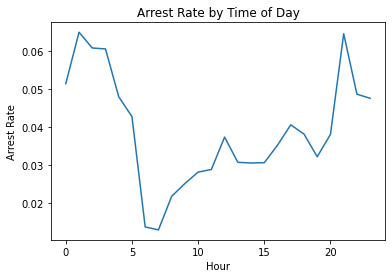

In [61]:
hourly_arrested.plot()
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.show()

<h2>Relação taxa de drogas e paradas</h2>

Se revermos nossa tabela, temos uma coluna booleana chamada `drugs_related_stop`, que nos diz se foi encontrada drogas na parada do carro. Busacaremos responder: a taxa de drogas encontradas vem aumentando ou diminuindo conforme o ano? Entretanto, temos em nosso data frame 10 anos de histórico de paradas. Para a reunião desses dados por ano usaremos o conceito de reamostragem de tempo. Através da função `resample()` podemos fazer esse rearanjo da maneira que quisermos. Para selecionar a frequência de cada ano passaremos a string "A", e então calculamos a média dos valores. Primeiro vamos colocar esse dado dentro de uma variável chamada `annual_drug_rate`:

Link para a documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">aqui</a>

In [62]:
annual_drug_rate = ri["drugs_related_stop"].resample("A").mean()
annual_drug_rate

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

Com esse dado separado, podemos visualizar graficamente como se dá relação: média de drogas encontradas por ano vs. anos. Usaremos a função do pandas (`df.plot()`) de plotagem de gráfico mais uma vez

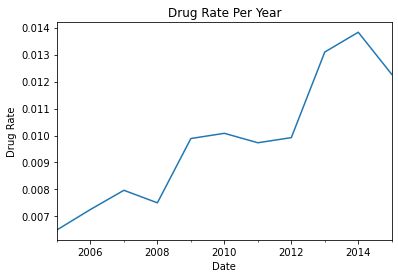

In [63]:
annual_drug_rate.plot()
plt.xlabel("Date")
plt.ylabel("Drug Rate")
plt.title("Drug Rate Per Year")
plt.show()

Veja que nos últimos 10 anos, a média praticamente dobrou. Logicamente falando, se houve a descoberta de drogas no veículo, é porque houve uma revista, e como vimos anteriormente, a coluna `search_conducted` é responsável por dizer se houve não uma revista. Vamos então analisar a relação entre a taxa de revistas por ano vs. a taxa de drogas por ano. Mais uma vez, vamos guardar esse valor

In [64]:
annual_search_rate = ri["search_conducted"].resample("A").mean()
annual_search_rate

stop_datetime
2005-12-31    0.049167
2006-12-31    0.041758
2007-12-31    0.044056
2008-12-31    0.040310
2009-12-31    0.049861
2010-12-31    0.044805
2011-12-31    0.035682
2012-12-31    0.033616
2013-12-31    0.030022
2014-12-31    0.031801
2015-12-31    0.028497
Freq: A-DEC, Name: search_conducted, dtype: float64

Agoram temos em mãos uma variável com a média de blitz ao ano e outra com a média de drogas encontradas ao ano. Podemos juntar esses dois dados de forma que veremos, graficamente, a relação entre essas variáveis. Para juntarmos esses dados, usaremos uma função do pandas chamada `pd.concat()`, que nos permite concatenar pandas series em qualquer eixo que quisermos

Link da documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html">aqui</a>

In [65]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis="columns")
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.006501,0.049167
2006-12-31,0.007258,0.041758
2007-12-31,0.007970,0.044056
2008-12-31,0.007505,0.040310
2009-12-31,0.009889,0.049861
2010-12-31,0.010081,0.044805
2011-12-31,0.009731,0.035682
2012-12-31,0.009921,0.033616
2013-12-31,0.013094,0.030022


Agora basta plotarmos o gráfico fazendo o comparativo entre ambos. Entretanto, podemos ver pela tabela que as variáveis estão em escalas diferentes, logo, se plotarmos ambas no mesmo gráfico, mal varemos algum tipo de relação entre elas. Para contornar esse problema, podemos passar o valor `True` para o parâmetro `subplots`, que faz com que cada nova coluna do data frame esteja em um gráfico diferente, mas compartilhando o mesmo eixo x (no caso, é o indice)

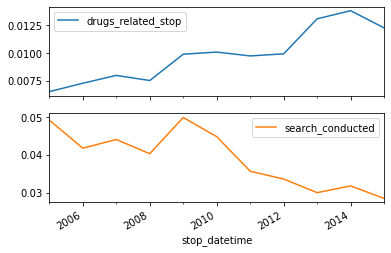

In [66]:
annual.plot(subplots=True)
plt.show()

Podemos ver que as revistas estão diminuindo com o passar dos anos. Seria esse um dos motivos de mais drogas estarem sendo portadas?

<h2>Relação entre violações e distrito</h2>

Como sabemos, Rhode Island é dividida em 6 distritos, então, qual violoações de trânsito ocorrem em cada distrito? Para explorar esse tipo de relação, teremos um novo recuros, conhecido como tabela de frequências. Tabelas de frequências são aquelas que armazenam a frequência da intersecção de um valor no índice com um valor na coluna. Com o pandas, podemos fazer uma tabela desse tipo digitando apenas `pd.crosstab()`, o qual recebe dois pandas series e faz o cálculo das frequências

Link da documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html">aqui</a>

In [67]:
all_zones = pd.crosstab(ri["district"], ri["violation"])
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


Agora que já reunimos esses dados, basta plotarmos o gráfico.

<h3>Bar plot</h3>

Quando estamos visualizando dados, é essêncial que comparemos quais são os tipos de dados que serão plotados, bem como o gráfico apropriado para cada situação. Se plotarmos um gráfico de linha com a tabela acima, veremos que não muito sentido, afinal ao percorremos o eixo x, vamos saindo de uma zona para outra? Não sentido em fazer esse tipo de gráfico. Por isso, usaremos um novo tipo, chamado de bar plot. 

O bar plot (ou plot em barra) é ideal para compararmos variáveis categóricas, baseada na quantidade de ocorrências de uma dessas variáveis, e a visualização das frequências é facilmente realizada, uma vez que cada barra é uma categoria diferente e a altura dela é a frequência. Podemo, mais uma vez através do pandas, realizar esse tipo de plotagem: basta passarmos o parâmetro `kind` como sendo a igual a string "bar" e pronto, automaticamente temos as barras geradas e separadas por cores automaticamente. Além do parâmetro `kind`, foi usado o parâmetro `figsize`, que recebe uma tupla de valores, e faz o desenho que receberá o gráfico. O primeiro valor da tupla indica a largura enquanto o segundo valor indica a altura. Também foi usado a função `plt.xticks()` para mudar a rotação do nome de cada distrito, para melhorar a visualização. As outras funções usadas já foram apresentadas anteriormente

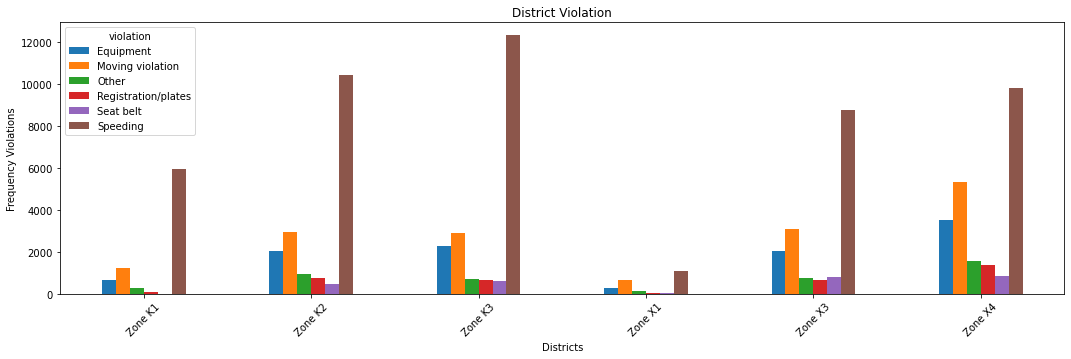

In [68]:
all_zones.plot(kind="bar", figsize=(18, 5))
plt.xlabel('Districts')
plt.ylabel("Frequency Violations")
plt.title("District Violation")
plt.xticks(rotation=45)
plt.show()

<h2>Qual a média de revistas por violação?</h2>

Como já vimos, basta agruparmos por quem queremos e então tirarmos a média da coluna que queremos:

In [69]:
search_rate = ri.groupby("violation")["search_conducted"].mean()

E mais uma vez, podemos simplesmente plotar o gráfico de barras:

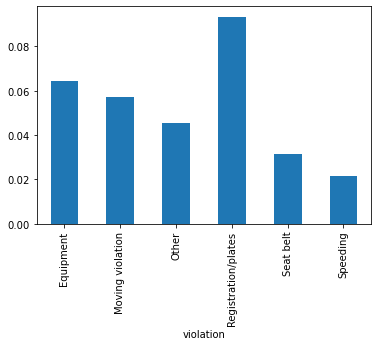

In [70]:
search_rate.plot(kind="bar")
plt.show()

Podemos fazer algumas mudanças no nosso gráfico de forma a deixá-lo melhor. Primeiramente, poderíamos ter as barras dispostas de forma ordenada, o que facilitaria o acompanhamento. Podemos ordenar um data frame através da função `pd.sort_values()`, que recebe uma coluna e faz o ordenamento do conjunto de dados, baseado naquela coluna. Além disso, podemos passar como tipo de gráfico a string "barh", que funciona exatamente como ao "bar", mas teremos as barras dispostas horizontalmente

Link da documentação do `pd.sort_values()` <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html">aqui</a>

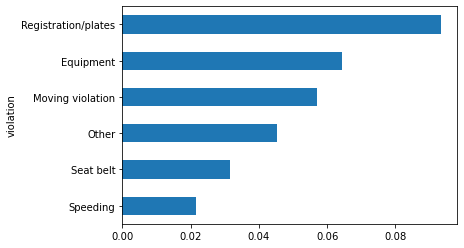

In [71]:
search_rate.sort_values().plot(kind="barh")
plt.show()

Com essa mudança, não só vemos as violações com mais paradas, como temos uma maior facilidade para enxergar qual tipo de violação foi cometida, já que as barras estão na horizontal

<h2>Por quanto tempo podemos ser parados por uma violação?</h2>

Relembrando nosso data frame `ri`, temos uma coluna chamada `stop_duration` que é do tipo `object` e guarda um intervalo que representa o tempo de duração de uma parada. Vamos dar uma olhada nessa coluna:

In [72]:
ri["stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

Bom, podemos ver que não temos os valores exatos, então como faremos para obter um valor referente ao tempo parado por uma violação? 

Para resolver este problema, usaremos uma estimação, que é representada na tabela abaixo:

$0-15 min \to 8 min$

$16-30 min \to 23 min$

$30+ \space min \to 45 min$

Contudo, como podemos mapear esses valores na coluna? O pandas nos permite fazer isso facilmente através da função `pd.Series.map()`, que recebe um dicionário, onde a chave é o valor que temos, e o valor é o valor que queremos. 

Link da documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html">aqui</a>

Sabendo disso, vamos começar montando os valores que queremos:

In [73]:
mapping = {"0-15 Min":8, "16-30 Min":23, "30+ Min":45}

Agora basta passarmos esse valor para dentro da função e criarmos uma nova coluna com esses valores:

In [74]:
ri["stop_minutes"] = ri["stop_duration"].map(mapping)
ri["stop_minutes"].unique()

array([ 8, 23, 45])

Calculando a média de minutos parados por cada violação:

In [75]:
stop_length = ri.groupby("violation_raw")["stop_minutes"].mean()
stop_length

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

Visualizando gráfico com a relação entre as variáveis:

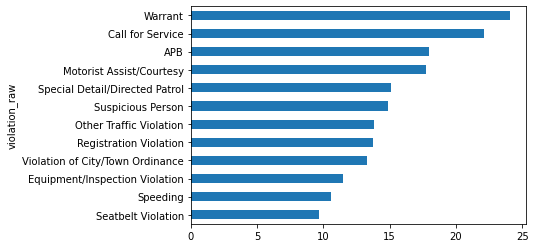

In [76]:
stop_length.sort_values().plot(kind="barh")
plt.show()

<h1>Pré-processamento Parte 2</h1>

Aprendemos a pré-processar dados fazendo alguns tratamentos, exploramos as variáveis existentes no conjunto de dados, e observamos relações entre elas. Neste ponto, iremos observar a relação entre as paradas realizadas pela polícia e as condições climáticas no momento em que ela foi feita. Será que há alguma relação entre a quantidade de paradas num mês e o clima daquele mês? Se houver chuvas teremos mais paradas? Poderemos responder a esses perguntas utilizando o outro conjunto de dados, chamado `weather.csv`, que contém os dados de uma única estação meteorológica perto do centro de Rhode Island, que nos dará uma noção geral do clima em todo o Estado, visto que Rhode Island é o menos Estado nos EUA

As colunas desse novo conjunto de dados estão divididas em:

- `TAVG`, `TIM`, `TMAX`: relacionadas à temperatura unidade é Fahrenheit
- `AWND`, `WSF2`: relacionada à velocidade do vento unidade é milhas por hora
- `WT01`...`WT22`: relacionadas a presença de condições climáticas adversas

In [81]:
weather = pd.read_csv("weather.csv")
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


<h2>Examinando dados</h2>

Assim como feita com o primeiro dataset, vamos examinar algumas colunas, de forma a entender como estão os dados e se podemos confiar neles

<h3>Analisando as colunas relacionadas à velocidade do vento</h3>

Temos duas colunas: A `AWND` que é a velocidade média do vento em milhas por hora e a coluna `WSF2`, que é a maior velocidade do vento em um período de 2 minutos também em milhas por hora

In [82]:
weather[["AWND", "WSF2"]].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


<h3>Observando estatísticas dessas colunas</h3>

Vamos dar uma olhada em algumas medidas estatísticas presentes nas colunas acima. Para isso basta usarmos o comando `df.describe()` e teremos acesso à esses valores

Link para a documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">aqui</a>

In [83]:
weather[["AWND", "WSF2"]].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


<h3>Visualização gráfica</h3>

Uma maneira de observar isso é através do gráfico de caixa (do inglês <i>box plot</i>). Esse tipo de gráfico é muito bom para enxergarmos medidas de posição, como a média, mediana, vermos intervalos de confiança e visualizar <i>outliers</i>. Usando o pandas podemos facilmente plotá-lo através do comando `df.plot(kind="box")`. Perceba que podemos fazer esse tipo de visualização porque as unidades são as mesmas e estão na mesma escala

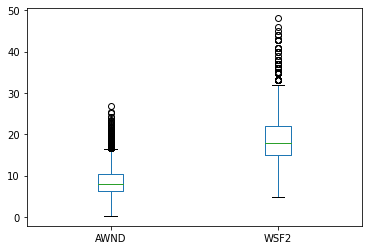

In [87]:
weather[["AWND", "WSF2"]].plot(kind="box")
plt.show()

<b>Como devemos interpretar esse gráfico?</b>

 valores indo do 25 quartil até o 75, a linha central representa a mediana, as linhas (ou bigodes) acima e abaixo da caixa representam o maior e o menor valor respectivamente, e os círculos são valores que foram considerados valores discrepantes (os <i>outliers</i>)
 
<h3>Explorando a coluna da temperatura</h3>

Faremos o mesmo tipo de análise com as colunas temperatura, para garantir que elas são confiáveis

In [88]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


Lembrando que estamos trabalhando com a unidade Fahrenheit, os valores presentes não parecem absurdos, logo, não precisaremos mexer em nada. Agora, assim como as colunas relacionadas à velocidade, faremos uma visualização desses valores com o box plot:

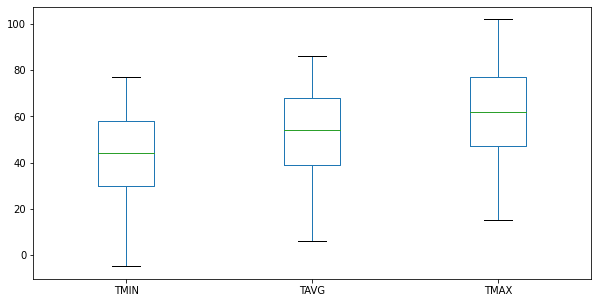

In [86]:
weather[["TMIN", "TAVG", 'TMAX']].plot(kind="box", figsize=(10, 5))
plt.show()

Podemos ver que todos estão nos conformes, onde todos os valores estão dentro do intervalo de confiança.

<h3>Visualizando distribuição de dados</h3>

Podemos ver isso através de histogramas. Um histograma é uma sumarização de variáveis quantitativas ou discretas. Neste escopo não estamos interessados em diferenciar esses tipos de variáveis. Com histogramas podemos ter a visualização numérica de pontos que estão dentro de uma faixa chamada de <i>bins</i>, que pode ser escolhida por nós. Mais uma vez o pandas mostra o quão completo é, e podemos plotar esse tipo de gráfico com a mesma linha de comando, mudando apenas o parâmetro `kind` para "hist". Criaremos uma nova coluna que armazenará o valor da diferença entre a temperatura máxima e a temperatura mínima, e observamos a distribuição desses dados

In [89]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [90]:
weather["TDIFF"].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

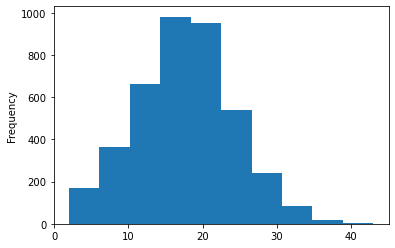

In [91]:
weather["TDIFF"].plot(kind="hist")
plt.show()

A visualização dessa distribuição não está ideal, não conseguimos ver o comportamento dos valores. Para melhorar isso basta aumentarmos os <i>bins</i>, que por padrão são 10

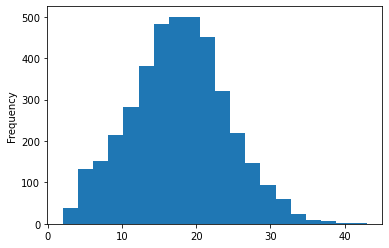

In [92]:
weather["TDIFF"].plot(kind="hist", bins=20)
plt.show()

Percebemos que não temos valores negativos, ou seja, não há temperaturas mínimas erradas e a distribuição é aparentemente normal. Esses fatores aumentam a confiança em relação a essa coluna

<h2>Avaliando o clima</h2>

Como vimos anteriormente, as colunas `WT01`...`WT22` representam as condições de clima ruim e se estendem de 1 até 22, por exemplo, `WT17` indica uma chuva de granizo ou a coluna `WT05` que indica ventos muito fortes. Veremos agora o quão ruim foi o clima em cada dia, Primeiro separamos as colunas com o método `loc`

In [93]:
wt = weather.loc[:, "WT01":"WT22"]
wt.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


Como todas as colunas são sobre estão preenchidas da mesma forma, vamos dar uma olhada nos valores únicos presentes na primeira coluna

In [94]:
wt["WT01"].unique()

array([ 1., nan])

Temos apenas dois valores, ou sejam, caso seja o valor 1, temos que ocorreu aquela determinada condição climática, caso seja $Nan$, ela a condição não aconteceu naquele dia

<b style="color:red">OBS</b>: Caso você queira verificar se todas as colunas são realmente preenchidas do mesmo jeito, basta visualizar descomentando o script abaixo:

In [95]:
# col_names = list(wt.columns)
# for col in col_names:
#     print(wt[col].unique())

Lembrando que cada linha é um dia diferente, vamos ver a quantidade de climas ruins que houveram ao longo do tempo em Rhode Island. Para isso basta somarmos os valores em cada linha, e esses valores serão armazenados em uma nova coluna

In [96]:
weather["bad_conditions"] = wt.sum(axis="columns")
weather["bad_conditions"].value_counts()

0.0    1749
1.0     613
4.0     476
3.0     380
2.0     367
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

Por fim, substituiremos o valor $Nan$ por 0, através da função `fillna()` e transformaremos o tipo de dado para inteiro

Link para a documentação do `fillna` <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html">aqui</a>

In [97]:
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

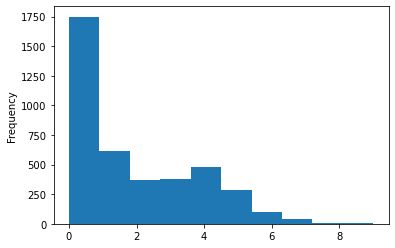

In [98]:
weather.bad_conditions.plot(kind="hist")
plt.show()

Podemos ver que a maior parte dos dias não possuem más condições climáticas

Agora podemos avaliar as condições climáticas, classificando-as em: good (valor 0), bad (valores de 1 até 4) e worse (valores de 5 até 9). Para isso, usaremos a já usada função `map()` para conseguirmos criar esses novos valores e armazená-los em uma nova coluna. Primeiramente vamos criar o dicionário com os valores

In [99]:
mapping = {}
mapping[0] = "good"
for value in weather["bad_conditions"].unique():
    if value >= 1 and value <= 4:
        mapping[value] = "bad"
    elif value >= 5:
        mapping[value] = "worse"
mapping

{0: 'good',
 2: 'bad',
 3: 'bad',
 4: 'bad',
 9: 'worse',
 6: 'worse',
 8: 'worse',
 5: 'worse',
 1: 'bad',
 7: 'worse'}

Agora, basta passarmos essa estrutura de dados para função e criarmos a nova coluna

In [100]:
weather["rating"] = weather["bad_conditions"].map(mapping)
weather["rating"].value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

Agora podemos saber as condições climáticas de uma maneira mais fácil, entretanto, antes de seguirmos, vemos acima que o tipo de dado da coluna `rating` está errado, pois estamos lidando com dados categóricos, mas eles estão como inteiro. Além disso, seria interessante que a tabela mostrasse uma sequência mais adequada, indo do melhor para o pior. Trataremos isso da seguinte maneira:

1. Criamos uma lista com a ordem dos valores que queremos, que no caso são as categorias. Faremos isso através do comando `pd.api.types.CategoricalDtype()`, que nos permite criar um tipo categórico de dado:

In [101]:
cats = pd.api.types.CategoricalDtype(categories=["good", "bad", "worse"], ordered=True)

<h4>Link para a documentação <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html">aqui</a></h4>

2. Por fim, passamos a lista acima como o novo tipo de dado para a coluna `rating`

In [102]:
weather["rating"] = weather["rating"].astype(cats)
weather["rating"].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

Note, que o nosso tipo de dado foi alterado para `object` e que há uma ordem de valor indo, do melhor para o pior: `['good' < 'bad' < 'worse']`

In [103]:
weather.shape

(4017, 30)

Por fim, vamos tirar uma coluna do nosso data frame: a coluna `STATION`. Por estarmos em uma única região, não há a necessidade de usá-la. Antes da remoção, vamos ver a quantidade de linhas e colunas

In [104]:
weather.drop(axis=1, columns="STATION", inplace=True)
weather.shape

(4017, 29)

<h1>Análise exploratória dos dados - Parte 2</h1>

<h2>Juntando data sets</h2>

Com as classificações das condições climáticas em mãos, o que devemos fazer é juntar essas informações, e então começarmos  a explorar as relações entre climas e uma parada/revista de um veículo. Antes de juntar as informações do clima com os dados das blitz, vamos rever ambos os 

In [105]:
display(ri.head(3))
weather.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8


,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2,bad
1,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16,2,bad
2,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,3,bad


Notamos que em ambos temos dados referentes a datas. Seria interessante se conseguirmos fazer um pareamento dos dias e ir encaixando a classificação do clima. Mas antes disso, precisamos retirar a coluna `stop_datetime` do índice, pois com a mesclagem poderíamos ter mesclagens erradas. Faremos isso através da função `df.reset_index()`

Link para a documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html">aqui</a>

In [106]:
ri.reset_index(inplace=True)
ri.head(3)

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8


Agora, precisamos varrer nosso data frame `weather`, de forma a selecionar apenas as colunas `DATE` e `rating`

In [107]:
weather_rating = weather[["DATE", "rating"]]
weather_rating.head(3)

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad


<h3>Mesclando os dados</h3>

Com ambos os conjuntos de dados prontos, podemos mesclá-los. Com pandas, basta um comando `pd.merge()` e temos a junção. Para funcionar, precisamos passar alguns parâmetros. Os que usaremos serão:

- `left`: quem será o data frame da esquerda
- `right`: qual o data frame na direita
- `left_on`: nome da coluna do data frame da esquerda que será usada
- `right_on`: nome da coluna do data frame da direita que será usada
- `how`: o tipo de junção que será feita

Para mais informações, a documentação está disponível <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html">aqui</a>

In [108]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on="stop_date", right_on="DATE", how="left")
ri_weather.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes,DATE,rating
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,2005-01-04,bad
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8,2005-01-23,worse
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,2005-02-17,good
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23,2005-02-20,bad
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8,2005-02-24,bad


Agora podemos voltar a coluna `stop_datetime` como nosso índice

In [109]:
ri_weather.set_index("stop_datetime", inplace=True)

In [110]:
ri_weather.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8,2005-02-24,bad


In [111]:
ri_weather.shape

(86536, 18)

<h2>O clima no dia afeta as prisões?</h2>

Com os dados relacionando a condição climática e as paradas policiais, podemos responder a pergunta acima. Antes de começarmos, vamos ver qual a média de pessoas presas

In [112]:
ri_weather["is_arrested"].mean()

0.0355690117407784

Vemos que é uma média extremamente baixa, isso é bom, significa que não há graves problemas em Rhode Island. Agora, vamos dar uma olhada na média de prisões por condição climática

In [113]:
ri_weather.groupby(by="rating")["is_arrested"].mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

Podemos perceber que a taxa de prisões quanto ao clima está muito ruim (worse), vemos que há um maior número de prisões de fato. Mas qual o comportamento dos tipos de violação e do clima? Vamos dar uma olhada usando `groupby()` 

In [114]:
arrest_rate = ri_weather.groupby(by=["violation", "rating"])["is_arrested"].mean()
arrest_rate

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

A taxa de prisões por violação são maiores a medidas em que o clima vai piorando. Isso só não se confere na infração de dirigir sem o cinto de segurança e na categoria `Other`. Entretanto, a visualização dessa tabela está um pouco estranha. Como podemos melhorar?

<h3>Convertendo pandas series para data frames</h3>

Se tivéssemos um tipo de dados `df`, teríamos uma melhor visualização. Através do comando `unstack()`. Perceba que o series acima possui um mult-index, podemos simplesmente desempilhar esse series, obtendo então um data frame: 

In [115]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


Uma outra forma de visualizarmos a mesma coisa é usando uma tabela de contingência, usada para o cálculo da observação de uma variável quantitativa em relação por várias variáveis categóricas. Com ela não precisaremos passar pelo `groupby` e em seguida desempilhar, usar o comando `df.pivot_table()`. Para o funcionamento dessa função, precisaremos dos seguintes parâmetro:

- `index`: qual coluna será usada como índice na tabela de contingência
- `columns`: qual coluna será como coluna na tabela de contingência
- `values`: qual coluna será usada. Por padrão, é calculada a média dos valores e então é feito o cruzamento entre índice x coluna para o preenchimento

Link da documentação <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html">aqui</a>

In [116]:
ri_weather.pivot_table(index="violation", columns="rating", values="is_arrested")

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886
